In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import re
import pywt
from scipy.signal import firwin, lfilter

In [39]:
def calcular_mad(lista):
    # Calcular la mediana de la lista
    mediana = np.median(lista)
    
    # Calcular las desviaciones absolutas de cada elemento respecto a la mediana
    desviaciones_absolutas = np.abs(np.array(lista) - mediana)
    
    # Calcular la mediana de las desviaciones absolutas
    mad = np.median(desviaciones_absolutas)
    
    return mad

In [40]:
fs= 1000;

# Ruta al archivo de texto
archivo = 'bruno1.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[:, 5]

# Convertir los datos de la sexta columna a una lista de Python

# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023

x = amplitud * voltaje_por_unidad * 1000  # Conversión a mV
# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(x) + 1)
ts=n/fs;

In [41]:
# Realizar la descomposición en wavelets db6
coeffs = pywt.wavedec(x, 'db6', level=5)

lst_med=[]

for coef in coeffs:
    mediana=np.median(coef)
    lst_med.append(mediana)

mad = calcular_mad(lst_med)
smad= mad/0.6745
# Establecer un umbral para el denoising
umbral = smad*(math.sqrt(len(x)))

# Aplicar el umbral a los coeficientes
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstruir la señal denoised
senal_denoised = pywt.waverec(coeffs_umbral, 'db6')


In [42]:
# Realizar la descomposición en wavelets db8
coeffs8 = pywt.wavedec(x, 'db8', level=5)

lst_med8=[]

for coef8 in coeffs8:
    mediana8=np.median(coef8)
    lst_med8.append(mediana8)

mad8 = calcular_mad(lst_med8)
smad8= mad8/0.6745
# Establecer un umbral para el denoising
umbral8 = smad8*(math.sqrt(len(x)))

# Aplicar el umbral a los coeficientes
coeffs_umbral8 = [pywt.threshold(c, umbral8, mode='soft') for c in coeffs8]

# Reconstruir la señal denoised
senal_denoised8 = pywt.waverec(coeffs_umbral8, 'db8')


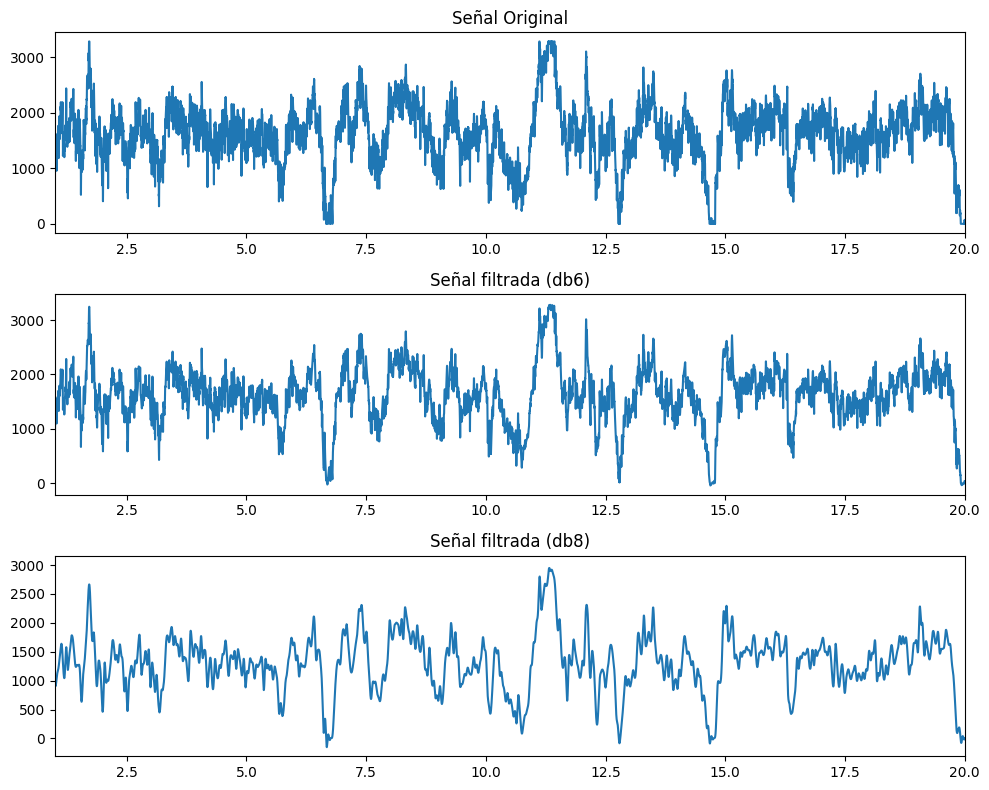

In [44]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(ts, x, label='Señal Original')
plt.xlim(1,20)
plt.title('Señal Original')

plt.subplot(3, 1, 2)
plt.plot(ts, senal_denoised, label='Señal Denoised')
plt.xlim(1,20)
plt.title('Señal filtrada (db6)')

plt.subplot(3, 1, 3)
plt.plot(ts, senal_denoised8, label='Señal Denoised')
plt.xlim(1,20)
plt.title('Señal filtrada (db8)')

plt.tight_layout()
plt.show()
